In [2]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [5]:
import numpy as np 
from tensorflow import keras 
import matplotlib.pyplot as plt 
import math

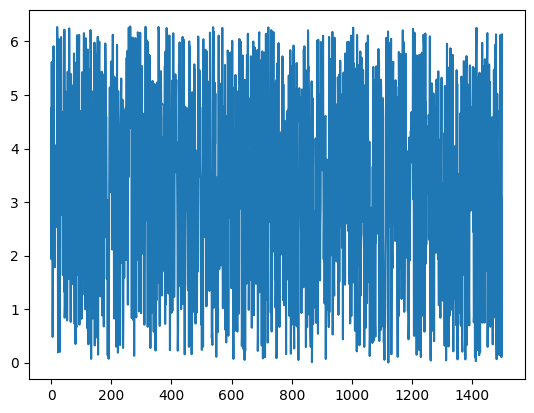

In [6]:
#사인파 생성, random ,seed 
SAMPLES =1500

np.random.seed(786)
tf.random.set_seed(786)

#uniform distribution으로 부터 최솟값 최댓값을 정하고, size만큼 샘플을 draw 한다 
#uniform distribution 외에 np.random.normal() normal(gaussian)distribution도 있다. 
x_value = np.random.uniform(low=0,high=2*math.pi,size=SAMPLES)
plt.plot(x_value)
plt.show()

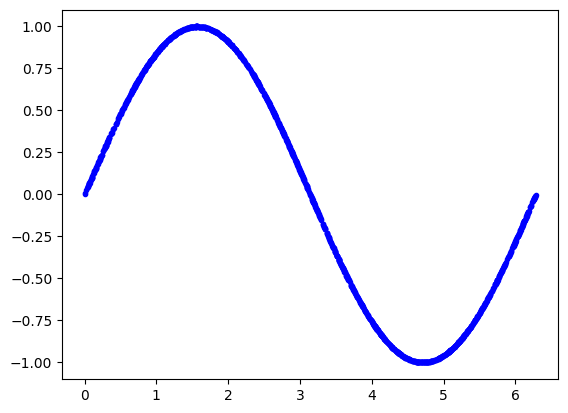

In [11]:
# x_value를 통해서 y_value 값 샘플링 
np.random.shuffle(x_value)#셔플이 필요함 
y_value = np.sin(x_value)

plt.plot(x_value, y_value,'b.')
plt.show()

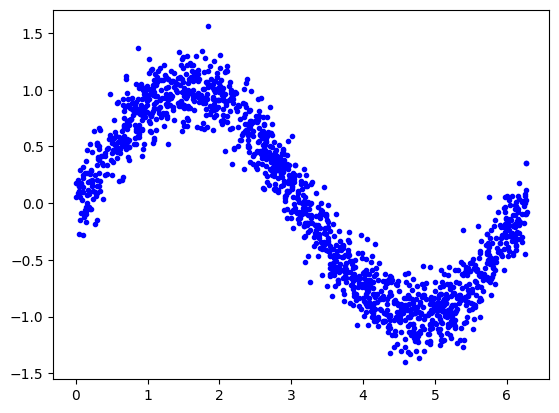

In [15]:
# 노이즈 
y_value = y_value +0.1*np.random.randn(*y_value.shape)
plt.plot(x_value, y_value,'b.')
plt.show()

900 300 300


Text(0.5, 1.0, 'test')

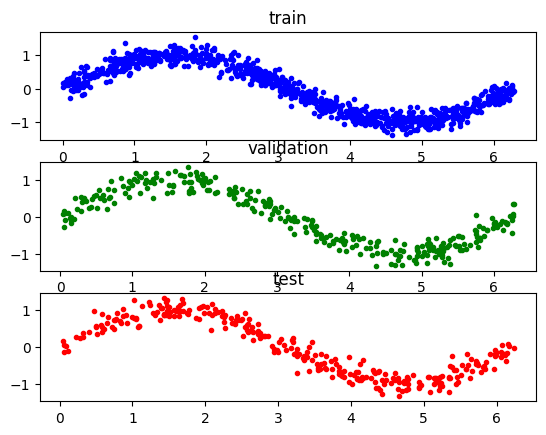

In [29]:
#train 60%
#validation 20% 
#test 20% 

TRAIN_SPLIT = int(0.6*SAMPLES)
TEST_SPLIT = int(0.2*SAMPLES)
VALIDATION_SPLIT = int(0.2*SAMPLES)

x_train, x_test, x_validation  = np.split(x_value,[TRAIN_SPLIT,TRAIN_SPLIT+TEST_SPLIT])
y_train, y_test, y_validation  = np.split(y_value,[TRAIN_SPLIT,TRAIN_SPLIT+TEST_SPLIT])
print(len(x_train),len(x_test),len(x_validation))

fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.plot(x_train,y_train,'b.',label='Train')
ax1.set_title('train')
ax2.plot(x_validation,y_validation,'g.',label='validation')
ax2.set_title('validation')
ax3.plot(x_test,y_test,'r.',label='test')
ax3.set_title('test')

In [32]:
#모델 생성, 컴파일 
model = tf.keras.Sequential()
model.add(keras.layers.Dense(16,activation='relu',input_shape=(1,)))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
train_info = model.fit(
    x_train,
    y_train,
    epochs=350,
    batch_size=64,
    validation_data=(x_validation,y_validation)
)

Epoch 1/350


15/15 [==============================] - 2s 20ms/step - loss: 0.5145 - mae: 0.5829 - val_loss: 0.4018 - val_mae: 0.5274
Epoch 2/350
15/15 [==============================] - 0s 4ms/step - loss: 0.4079 - mae: 0.5468 - val_loss: 0.3825 - val_mae: 0.5314
Epoch 3/350
15/15 [==============================] - 0s 4ms/step - loss: 0.3915 - mae: 0.5413 - val_loss: 0.3614 - val_mae: 0.5148
Epoch 4/350
15/15 [==============================] - 0s 4ms/step - loss: 0.3689 - mae: 0.5232 - val_loss: 0.3393 - val_mae: 0.4974
Epoch 5/350
15/15 [==============================] - 0s 4ms/step - loss: 0.3395 - mae: 0.5026 - val_loss: 0.3109 - val_mae: 0.4774
Epoch 6/350
15/15 [==============================] - 0s 7ms/step - loss: 0.3103 - mae: 0.4815 - val_loss: 0.2901 - val_mae: 0.4626
Epoch 7/350
15/15 [==============================] - 0s 5ms/step - loss: 0.2874 - mae: 0.4657 - val_loss: 0.2704 - val_mae: 0.4471
Epoch 8/350
15/15 [==============================] - 0s 4ms/step - loss: 0.2648 

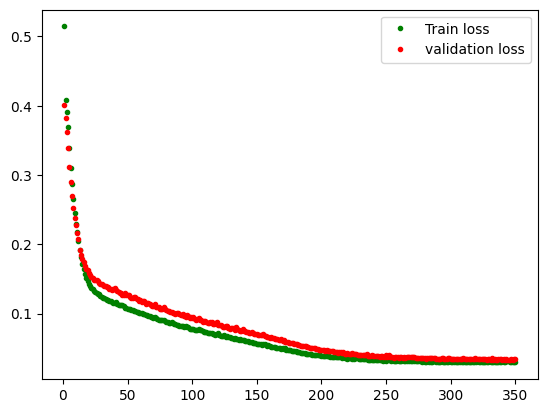

In [54]:
loss = train_info.history['loss']
validation_loss = train_info.history['val_loss']

epochs_list = range(1,350+1)
plt.plot(epochs_list,loss,'g.',label='Train loss')
plt.plot(epochs_list,validation_loss,'r.',label='validation loss')
plt.legend(loc='upper right')


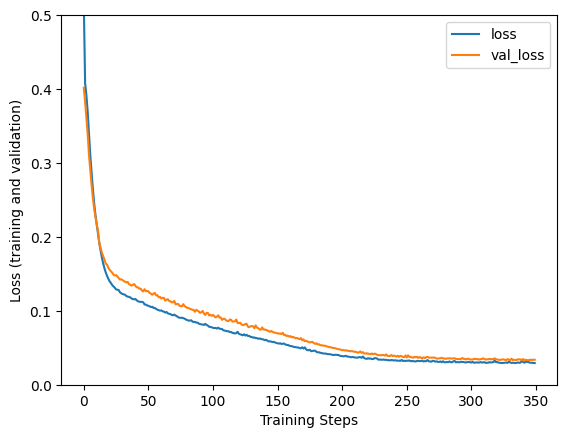

In [43]:

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,0.5])
plt.plot(loss,label='loss')
plt.plot(validation_loss,label='val_loss')
plt.legend(loc='upper right')


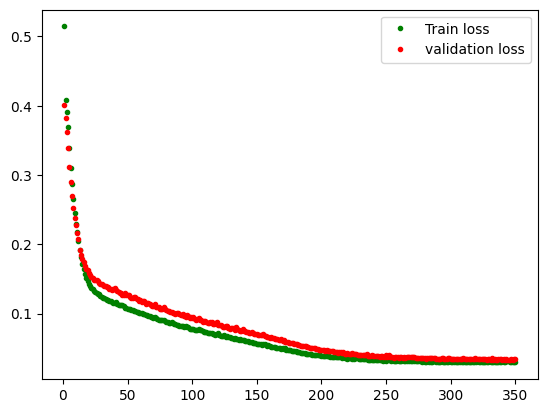

In [56]:
SKIP =0

plt.plot(epochs_list[SKIP:],loss[SKIP:],'g.',label='Train loss')
plt.plot(epochs_list[SKIP:],validation_loss[SKIP:],'r.',label='validation loss')
plt.legend(loc='upper right')

10/10 [==============================] - 0s 1ms/step


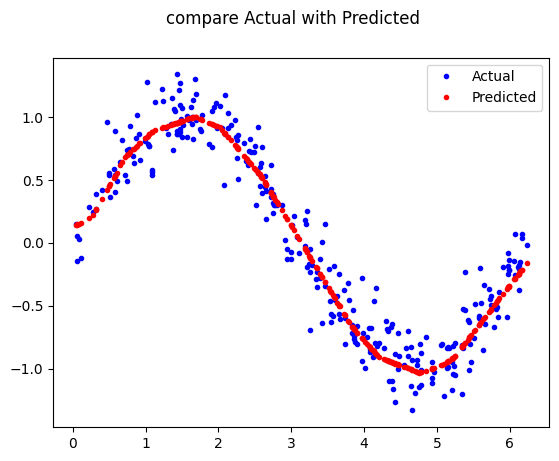

In [57]:
loss = model.evaluate(x_test,y_test)
predictions = model.predict(x_test)

plt.plot(x_test,y_test,'b.',label='Actual')
plt.plot(x_test,predictions, 'r.',label='Predicted')
plt.suptitle('compare Actual with Predicted')
plt.legend(loc='upper right')

In [59]:
#TFLITE CONVERTER 
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations =[tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

#save
open("sinewave_model.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmp4rt6cydm\assets


INFO:tensorflow:Assets written to: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmp4rt6cydm\assets


3196

In [60]:
from tensorflow.lite.python.util import convert_bytes_to_c_source 
#c파일로 볼 수 있도록 convert 해줌 

source, header = convert_bytes_to_c_source(
    tflite_model,
    "sine_model",
    include_path = "sine_model.h"
)

with open('sine_model.h','w') as file: 
    file.write(header)
    
with open('sine_model.cpp','w') as file: 
    file.write(source)
